# Import the data into a DataFrame

In [41]:
import pandas as pd

df = pd.read_csv('../../data/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
# check the missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Encode the categorical variables into numerical values

Notice that the 'horsepower' and 'car name' columns are object types. We need to check the abnormal values in 'horsepower' column and encode the 'car name'(string type) column into numerical values. 

## Drop the 6 rows with "missing values"('?') in 'horsepower' column

In [43]:
# Drop rows with missing values in horsepower column
df = df.dropna(subset=['horsepower'])

# Check the result
print(f"DataFrame shape after dropping missing horsepower values: {df.shape}")
print(f"Missing values in horsepower: {df['horsepower'].isnull().sum()}")


DataFrame shape after dropping missing horsepower values: (398, 9)
Missing values in horsepower: 0


## Encode the 'car name' column using Label Encoding

In [44]:
# Extract car brands from car name column
car_brands = df['car name'].str.split().str[0].unique()
print(f"Number of unique car brands: {len(car_brands)}")
print(f"Car brands: {sorted(car_brands)}")

# Check the distribution of car brands
brand_counts = df['car name'].str.split().str[0].value_counts()
print(f"\nTop 10 most common car brands:")
print(brand_counts.head(10))

Number of unique car brands: 37
Car brands: ['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']

Top 10 most common car brands:
car name
ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: count, dtype: int64


In [45]:
# Use one-hot encoding for car brands instead of label encoding

# Extract car brands from car name column
df['car_brand'] = df['car name'].str.split().str[0]

# Create one-hot encoded columns for car brands
brand_dummies = pd.get_dummies(df['car_brand'], prefix='brand')

# Concatenate the one-hot encoded columns to the original dataframe
df = pd.concat([df, brand_dummies], axis=1)

# Drop the intermediate car_brand column
df = df.drop(['car_brand'], axis=1)

# Check the result
print(f"DataFrame shape after one-hot encoding: {df.shape}")
print(f"New brand columns created: {len(brand_dummies.columns)}")
print(f"Brand columns: {list(brand_dummies.columns)}")

# Show sample of the dataframe with some brand columns
brand_cols = [col for col in df.columns if col.startswith('brand_')]
print(f"\nSample of dataframe with brand columns:")
print(df[['car name'] + brand_cols[:5]].head())

DataFrame shape after one-hot encoding: (398, 46)
New brand columns created: 37
Brand columns: ['brand_amc', 'brand_audi', 'brand_bmw', 'brand_buick', 'brand_cadillac', 'brand_capri', 'brand_chevroelt', 'brand_chevrolet', 'brand_chevy', 'brand_chrysler', 'brand_datsun', 'brand_dodge', 'brand_fiat', 'brand_ford', 'brand_hi', 'brand_honda', 'brand_maxda', 'brand_mazda', 'brand_mercedes', 'brand_mercedes-benz', 'brand_mercury', 'brand_nissan', 'brand_oldsmobile', 'brand_opel', 'brand_peugeot', 'brand_plymouth', 'brand_pontiac', 'brand_renault', 'brand_saab', 'brand_subaru', 'brand_toyota', 'brand_toyouta', 'brand_triumph', 'brand_vokswagen', 'brand_volkswagen', 'brand_volvo', 'brand_vw']

Sample of dataframe with brand columns:
                    car name  brand_amc  brand_audi  brand_bmw  brand_buick  \
0  chevrolet chevelle malibu      False       False      False        False   
1          buick skylark 320      False       False      False         True   
2         plymouth satellite

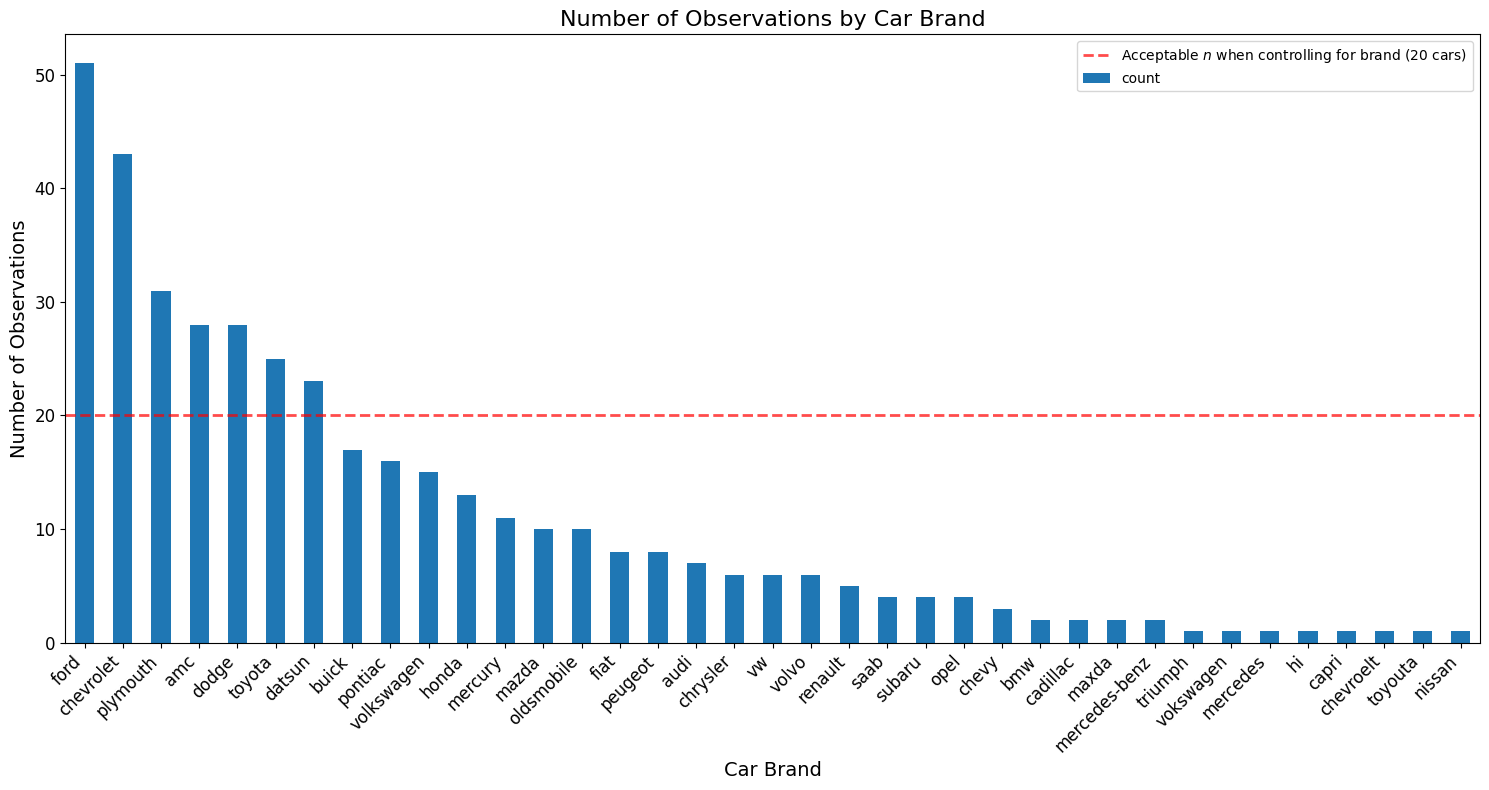

Total number of unique brands: 37
Most common brand: ford (51 cars)
Least common brands: ['triumph', 'vokswagen', 'mercedes', 'hi', 'capri', 'chevroelt', 'toyouta', 'nissan']


In [53]:
import matplotlib.pyplot as plt

# Create a bar plot showing the number of observations for each brand
plt.figure(figsize=(15, 8))
brand_counts.plot(kind='bar')
plt.axhline(y=20, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Acceptable $n$ when controlling for brand (20 cars)')
plt.title('Number of Observations by Car Brand', fontsize=16)
plt.xlabel('Car Brand', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('../results/brand_distribution.png')
plt.show()

# Print summary statistics
print(f"Total number of unique brands: {len(brand_counts)}")
print(f"Most common brand: {brand_counts.index[0]} ({brand_counts.iloc[0]} cars)")
print(f"Least common brands: {list(brand_counts[brand_counts == 1].index)}")

# Distribution of the variables

Check the distribution of the target and pedictor variables and identify potential outliers that are beyond 95\% quantile range.


mpg:
  Q1: 17.50, Q3: 29.00, IQR: 11.50
  Lower bound: 0.25, Upper bound: 46.25
  Number of outliers: 1
  Outlier values: [46.6]

cylinders:
  Q1: 4.00, Q3: 8.00, IQR: 4.00
  Lower bound: -2.00, Upper bound: 14.00
  Number of outliers: 0

displacement:
  Q1: 104.25, Q3: 262.00, IQR: 157.75
  Lower bound: -132.38, Upper bound: 498.62
  Number of outliers: 0

horsepower:
  Q1: 75.00, Q3: 126.00, IQR: 51.00
  Lower bound: -1.50, Upper bound: 202.50
  Number of outliers: 10
  Outlier values: [208.0, 210.0, 215.0, 215.0, 215.0, 220.0, 225.0, 225.0, 225.0, 230.0]

weight:
  Q1: 2223.75, Q3: 3608.00, IQR: 1384.25
  Lower bound: 147.38, Upper bound: 5684.38
  Number of outliers: 0

acceleration:
  Q1: 13.83, Q3: 17.18, IQR: 3.35
  Lower bound: 8.80, Upper bound: 22.20
  Number of outliers: 7
  Outlier values: [8.0, 8.5, 8.5, 23.5, 23.7, 24.6, 24.8]

model year:
  Q1: 73.00, Q3: 79.00, IQR: 6.00
  Lower bound: 64.00, Upper bound: 88.00
  Number of outliers: 0

origin:
  Q1: 1.00, Q3: 2.00, IQR

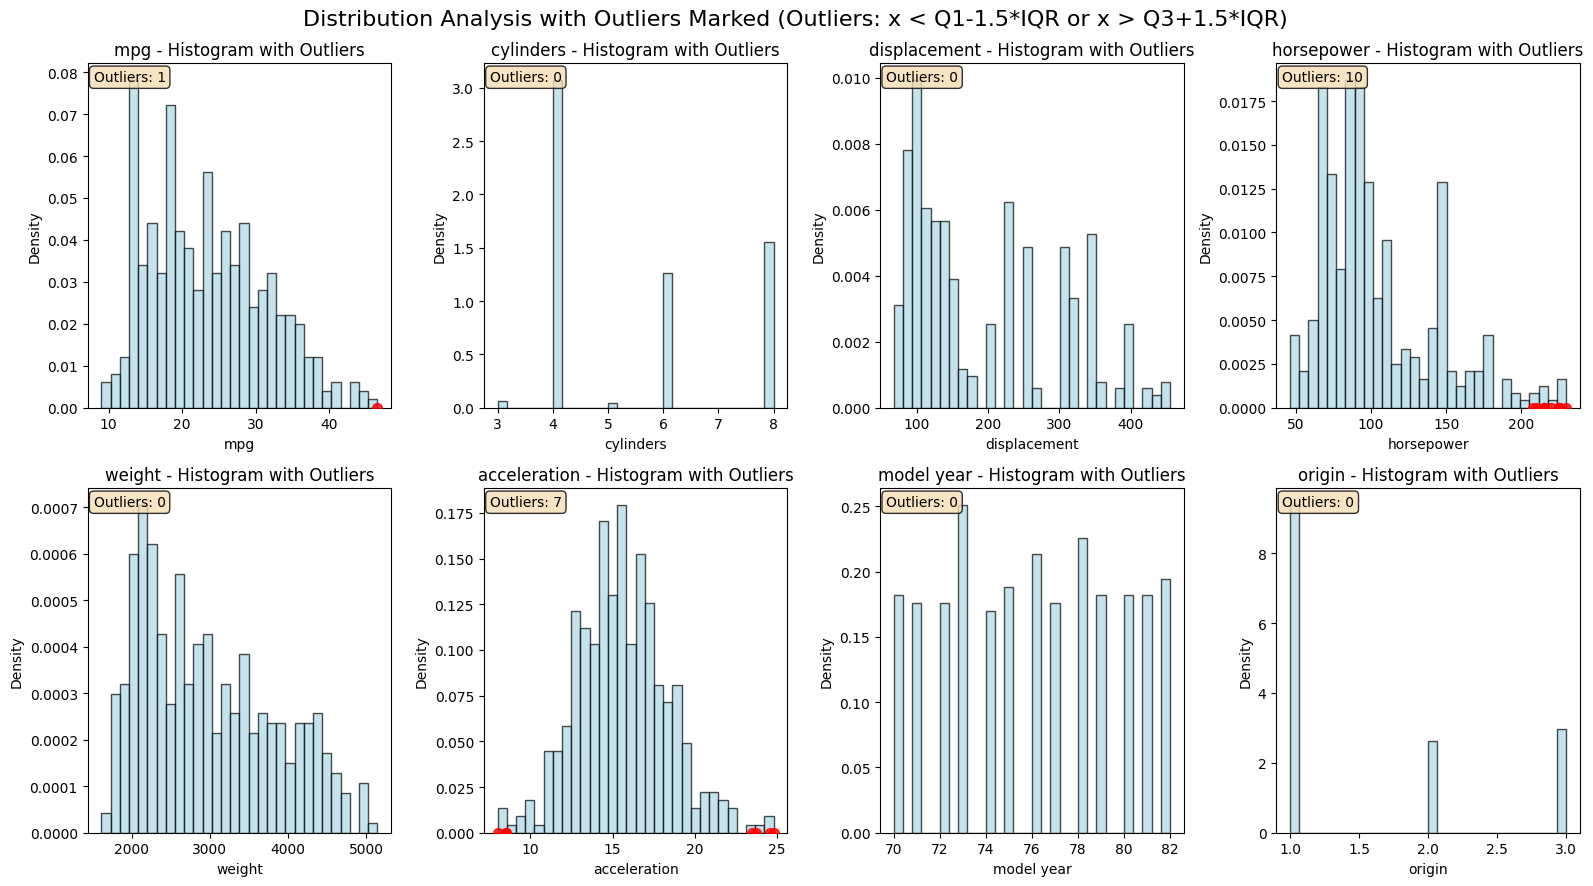

In [73]:
import numpy as np
import seaborn as sns

# Get the first 8 columns (numerical columns)
numerical_cols = df.columns[:8]

# Create subplots for histograms only
fig, axes = plt.subplots(2, 4, figsize=(16, 9))
fig.suptitle('Distribution Analysis with Outliers Marked (Outliers: x < Q1-1.5*IQR or x > Q3+1.5*IQR)', fontsize=16, y=0.98)

# Flatten axes for easier indexing
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Convert horsepower to numeric if it's object type
    if col == 'horsepower':
        data = pd.to_numeric(df[col], errors='coerce')
    else:
        data = df[col]
    
    # Remove any NaN values
    data = data.dropna()
    
    # Calculate IQR and outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Create histogram
    axes[i].hist(data, bins=30, density=True, alpha=0.7, edgecolor='black', color='lightblue')
    
    # Mark outliers as red dots
    if len(outliers) > 0:
        # For each outlier, add a red dot at the bottom of the plot
        y_min = axes[i].get_ylim()[0]
        axes[i].scatter(outliers, [y_min] * len(outliers), color='red', s=50, zorder=5, alpha=0.8)
    
    axes[i].set_title(f'{col} - Histogram with Outliers')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Add outlier count text
    axes[i].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                transform=axes[i].transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Print outlier statistics
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier values: {sorted(outliers.values)}")

plt.tight_layout()
plt.savefig('../results/numerical_distributions_with_outliers.png')
plt.show()

# A preliminary analysis of ANOVA

In [61]:
from scipy import stats

# Perform one-way ANOVA to test the effect of origin on mpg
# Group mpg values by origin
origin_groups = [df[df['origin'] == i]['mpg'] for i in df['origin'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*origin_groups)

print("One-way ANOVA: Effect of Origin on MPG")
print("=" * 50)
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print(f"\nResult: Reject null hypothesis (p < {alpha})")
    print("There is a statistically significant effect of origin on MPG.")
else:
    print(f"\nResult: Fail to reject null hypothesis (p >= {alpha})")
    print("There is no statistically significant effect of origin on MPG.")

# Display descriptive statistics by origin
print("\nDescriptive Statistics by Origin:")
print("-" * 50)
for origin in sorted(df['origin'].unique()):
    group_data = df[df['origin'] == origin]['mpg']
    print(f"Origin {origin}: n={len(group_data)}, mean={group_data.mean():.2f}, std={group_data.std():.2f}")

One-way ANOVA: Effect of Origin on MPG
F-statistic: 98.5418
p-value: 0.0000

Result: Reject null hypothesis (p < 0.05)
There is a statistically significant effect of origin on MPG.

Descriptive Statistics by Origin:
--------------------------------------------------
Origin 1: n=249, mean=20.08, std=6.40
Origin 2: n=70, mean=27.89, std=6.72
Origin 3: n=79, mean=30.45, std=6.09


Degrees of freedom: Between groups = 2, Within groups = 395


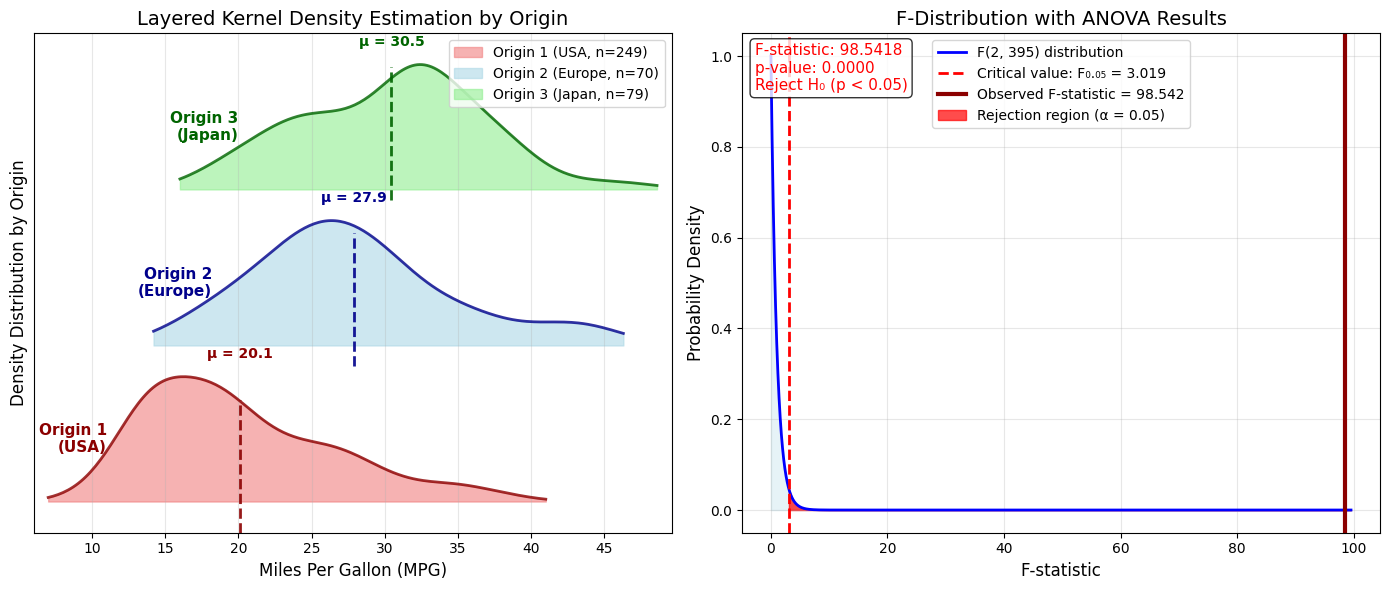


Detailed ANOVA Summary:
Null Hypothesis (H₀): All group means are equal
Alternative Hypothesis (H₁): At least one group mean differs
Significance level (α): 0.05
Degrees of freedom: Between = 2, Within = 395
Critical F-value: 3.0186
Observed F-statistic: 98.5418
P-value: 0.0000
Conclusion: Reject H₀

Interpretation: There is sufficient evidence (p = 0.0000 < α = 0.05) to conclude
that the origin of the car significantly affects fuel efficiency (MPG).


In [79]:
# Visualize ANOVA results on F-distribution
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate degrees of freedom
k = len(df['origin'].unique())  # number of groups
n = len(df)  # total sample size
df_between = k - 1  # degrees of freedom between groups
df_within = n - k   # degrees of freedom within groups

print(f"Degrees of freedom: Between groups = {df_between}, Within groups = {df_within}")

# Create F-distribution plot
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: F-distribution with critical value and observed F-statistic
x = np.linspace(0, max(6, f_statistic + 1), 1000)
f_dist = stats.f(df_between, df_within)
y = f_dist.pdf(x)

# Plot the F-distribution
ax1.plot(x, y, 'b-', linewidth=2, label=f'F({df_between}, {df_within}) distribution')
ax1.fill_between(x, y, alpha=0.3, color='lightblue')

# Mark the critical value
alpha = 0.05
f_critical = f_dist.ppf(1 - alpha)
ax1.axvline(f_critical, color='red', linestyle='--', linewidth=2, 
           label=f'Critical value: F₀.₀₅ = {f_critical:.3f}')

# Mark the observed F-statistic
ax1.axvline(f_statistic, color='darkred', linewidth=3, 
           label=f'Observed F-statistic = {f_statistic:.3f}')

# Shade the rejection region
x_reject = x[x >= f_critical]
y_reject = f_dist.pdf(x_reject)
ax1.fill_between(x_reject, y_reject, alpha=0.7, color='red', 
                label=f'Rejection region (α = {alpha})')

ax1.set_xlabel('F-statistic', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('F-Distribution with ANOVA Results', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add text box with results
result_text = f"F-statistic: {f_statistic:.4f}\np-value: {p_value:.4f}\n"
if p_value < alpha:
    result_text += f"Reject H₀ (p < {alpha})"
    conclusion_color = 'red'
else:
    result_text += f"Fail to reject H₀ (p ≥ {alpha})"
    conclusion_color = 'blue'

ax1.text(0.02, 0.98, result_text, transform=ax1.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontsize=11, color=conclusion_color)

# Plot 2: Layered kernel density plot of MPG by Origin
origin_labels = {1: 'USA', 2: 'Europe', 3: 'Japan'}
colors = ['lightcoral', 'lightblue', 'lightgreen']
edge_colors = ['darkred', 'darkblue', 'darkgreen']

# Create layered density plots
layer_height = 0.8  # Height of each layer
layer_spacing = 1.0  # Spacing between layers

for i, origin in enumerate(sorted(df['origin'].unique())):
    origin_data = df[df['origin'] == origin]['mpg']
    
    # Calculate kernel density estimation
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(origin_data)
    
    # Create x values for smooth curve
    x_min, x_max = origin_data.min() - 2, origin_data.max() + 2
    x_smooth = np.linspace(x_min, x_max, 200)
    density = kde(x_smooth)
    
    # Normalize density for layering (scale to fit within layer height)
    density_scaled = (density / density.max()) * layer_height
    
    # Vertical offset for each layer
    y_offset = i * layer_spacing
    
    # Plot the density curve
    ax2.fill_between(x_smooth, y_offset, y_offset + density_scaled, 
                    alpha=0.6, color=colors[i], 
                    label=f'Origin {origin} ({origin_labels[origin]}, n={len(origin_data)})')
    
    # Add outline
    ax2.plot(x_smooth, y_offset + density_scaled, 
            color=edge_colors[i], linewidth=2, alpha=0.8)
    
    # Add mean line
    mean_mpg = origin_data.mean()
    ax2.axvline(x=mean_mpg, ymin=(y_offset)/(len(df['origin'].unique())*layer_spacing), 
               ymax=(y_offset + layer_height)/(len(df['origin'].unique())*layer_spacing), 
               color=edge_colors[i], linestyle='--', linewidth=2, alpha=0.9)
    
    # Add mean value text
    ax2.text(mean_mpg, y_offset + layer_height + 0.1, 
            f'μ = {mean_mpg:.1f}', 
            ha='center', va='bottom', fontweight='bold', 
            color=edge_colors[i], fontsize=10)
    
    # Add origin label on the left
    ax2.text(x_min + 4, y_offset + layer_height/2, 
            f'Origin {origin}\n({origin_labels[origin]})', 
            ha='right', va='center', fontweight='bold', 
            color=edge_colors[i], fontsize=11)

ax2.set_xlabel('Miles Per Gallon (MPG)', fontsize=12)
ax2.set_ylabel('Density Distribution by Origin', fontsize=12)
ax2.set_title('Layered Kernel Density Estimation by Origin', fontsize=14)
ax2.grid(True, alpha=0.3)

# Remove y-axis ticks since they're not meaningful for layered densities
ax2.set_yticks([])

# Set x-axis limits
all_mpg = df['mpg']
ax2.set_xlim(all_mpg.min() - 3, all_mpg.max() + 3)
ax2.set_ylim(-0.2, len(df['origin'].unique()) * layer_spacing)

# Add legend
ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig('../results/anova_origin_mpg.png')
plt.show()

# Additional statistical summary
print("\nDetailed ANOVA Summary:")
print("=" * 60)
print(f"Null Hypothesis (H₀): All group means are equal")
print(f"Alternative Hypothesis (H₁): At least one group mean differs")
print(f"Significance level (α): {alpha}")
print(f"Degrees of freedom: Between = {df_between}, Within = {df_within}")
print(f"Critical F-value: {f_critical:.4f}")
print(f"Observed F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Reject H₀' if p_value < alpha else 'Fail to reject H₀'}")

if p_value < alpha:
    print(f"\nInterpretation: There is sufficient evidence (p = {p_value:.4f} < α = {alpha}) to conclude")
    print("that the origin of the car significantly affects fuel efficiency (MPG).")
else:
    print(f"\nInterpretation: There is insufficient evidence (p = {p_value:.4f} ≥ α = {alpha}) to conclude")
    print("that the origin of the car significantly affects fuel efficiency (MPG).")

In [75]:
# Generate LaTeX-formatted ANOVA summary table
print("LaTeX Table for ANOVA Results:")
print("=" * 60)

latex_table = f"""
\\begin{{table}}[h!]
\\centering
\\caption{{One-Way ANOVA Results: Effect of Car Origin on Fuel Efficiency (MPG)}}
\\label{{tab:anova_results}}
\\begin{{tabular}}{{lc}}
\\toprule
\\textbf{{ANOVA Summary}} & \\textbf{{Value}} \\\\
\\midrule
Null Hypothesis (H₀) & All group means are equal \\\\
Alternative Hypothesis (H₁) & At least one group mean differs \\\\
Significance level (α) & {alpha:.3f} \\\\
\\midrule
Total sample size (N) & {len(df)} \\\\
Number of groups (k) & {len(df['origin'].unique())} \\\\
Degrees of freedom (Between groups) & {df_between} \\\\
Degrees of freedom (Within groups) & {df_within} \\\\
Critical F-value & {f_critical:.4f} \\\\
Observed F-statistic & {f_statistic:.4f} \\\\
P-value & {p_value:.6f} \\\\
\\midrule
Statistical Decision & Reject H₀ \\\\
Effect Size (η²) & {f_statistic * df_between / (f_statistic * df_between + df_within):.4f} \\\\
\\bottomrule
\\end{{tabular}}
\\end{{table}}

\\vspace{{0.5cm}}

\\begin{{table}}[h!]
\\centering
\\caption{{Descriptive Statistics by Car Origin}}
\\label{{tab:descriptive_stats}}
\\begin{{tabular}}{{lccc}}
\\toprule
\\textbf{{Origin}} & \\textbf{{Sample Size (n)}} & \\textbf{{Mean MPG}} & \\textbf{{Standard Deviation}} \\\\
\\midrule"""

# Add descriptive statistics for each origin
for origin in sorted(df['origin'].unique()):
    group_data = df[df['origin'] == origin]['mpg']
    origin_name = origin_labels[origin]
    latex_table += f"""
Origin {origin} ({origin_name}) & \\textbf{{{len(group_data)}}} & {group_data.mean():.2f} & {group_data.std():.2f} \\\\"""

latex_table += f"""
\\midrule
\\textbf{{Total}} & \\textbf{{{len(df)}}} & {df['mpg'].mean():.2f} & {df['mpg'].std():.2f} \\\\
\\bottomrule
\\end{{tabular}}
\\end{{table}}

\\textbf{{Interpretation:}} There is sufficient evidence (p < 0.001) to conclude that the origin of the car significantly affects fuel efficiency (MPG). The effect size (η² = {f_statistic * df_between / (f_statistic * df_between + df_within):.4f}) indicates a large practical effect."""

print(latex_table)

# Also create a simpler combined table option
print("\n" + "="*60)
print("Alternative: Combined ANOVA Table (more compact)")
print("="*60)

combined_table = f"""
\\begin{{table}}[h!]
\\centering
\\caption{{ANOVA Results: Effect of Car Origin on MPG}}
\\label{{tab:anova_combined}}
\\begin{{tabular}}{{llcc}}
\\toprule
\\multicolumn{{2}}{{c}}{{\\textbf{{ANOVA Summary}}}} & \\multicolumn{{2}}{{c}}{{\\textbf{{Descriptive Statistics}}}} \\\\
\\cmidrule(lr){{1-2}} \\cmidrule(lr){{3-4}}
\\textbf{{Statistic}} & \\textbf{{Value}} & \\textbf{{Origin}} & \\textbf{{Mean ± SD (n)}} \\\\
\\midrule"""

# Add ANOVA stats and descriptive stats side by side
stats_data = [
    (f"F-statistic", f"{f_statistic:.4f}"),
    (f"p-value", f"{p_value:.6f}"),
    (f"df (between, within)", f"({df_between}, {df_within})"),
    (f"Effect size (η²)", f"{f_statistic * df_between / (f_statistic * df_between + df_within):.4f}")
]

descriptive_data = []
for origin in sorted(df['origin'].unique()):
    group_data = df[df['origin'] == origin]['mpg']
    origin_name = origin_labels[origin]
    descriptive_data.append((f"{origin_name}", f"{group_data.mean():.2f} ± {group_data.std():.2f} ({len(group_data)})"))

# Pad the shorter list
max_rows = max(len(stats_data), len(descriptive_data))
while len(stats_data) < max_rows:
    stats_data.append(("", ""))
while len(descriptive_data) < max_rows:
    descriptive_data.append(("", ""))

for i in range(max_rows):
    combined_table += f"""
{stats_data[i][0]} & {stats_data[i][1]} & {descriptive_data[i][0]} & {descriptive_data[i][1]} \\\\"""

combined_table += f"""
\\bottomrule
\\end{{tabular}}
\\end{{table}}

\\textbf{{Conclusion:}} Reject H₀ (p < 0.001). Car origin significantly affects MPG."""

print(combined_table)

LaTeX Table for ANOVA Results:

\begin{table}[h!]
\centering
\caption{One-Way ANOVA Results: Effect of Car Origin on Fuel Efficiency (MPG)}
\label{tab:anova_results}
\begin{tabular}{lc}
\toprule
\textbf{ANOVA Summary} & \textbf{Value} \\
\midrule
Null Hypothesis (H₀) & All group means are equal \\
Alternative Hypothesis (H₁) & At least one group mean differs \\
Significance level (α) & 0.050 \\
\midrule
Total sample size (N) & 398 \\
Number of groups (k) & 3 \\
Degrees of freedom (Between groups) & 2 \\
Degrees of freedom (Within groups) & 395 \\
Critical F-value & 3.0186 \\
Observed F-statistic & 98.5418 \\
P-value & 0.000000 \\
\midrule
Statistical Decision & Reject H₀ \\
Effect Size (η²) & 0.3329 \\
\bottomrule
\end{tabular}
\end{table}

\vspace{0.5cm}

\begin{table}[h!]
\centering
\caption{Descriptive Statistics by Car Origin}
\label{tab:descriptive_stats}
\begin{tabular}{lccc}
\toprule
\textbf{Origin} & \textbf{Sample Size (n)} & \textbf{Mean MPG} & \textbf{Standard Deviation} \\
